#### train_on_batch 
* 모델을 훈련할 때 fit()함수를 통해 훈련을 진행한다. 
* fit()함수를 사용하면 전체 배치에 대하여 훈련을 진행한 후에 1 epoch가 끝나면 전체 훈련 손실함수와 평가지표를 보여준다. 

In [1]:
import os 
import cv2 
import sys 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 

In [15]:
from IPython.display import SVG
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Input 
from tensorflow.keras.optimizers import Adam, RMSprop  
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.utils import to_categorical, model_to_dot, Sequence 

In [12]:
def get_show_shape(images):
    for i in range(len(images)):
        print(f"shape {images[i].shape}")

def get_show_images(images, labels, ncols=15):
    fig, axes = plt.subplots(3 , 5)
    fig.set_size_inches(15, 15)
    for i in range(ncols):
        ax=axes[i//5, i%5]
        ax.imshow(images[i], cmap="gray")
        ax.axis("off")
        ax.set_title(str(labels[i]))
    plt.tight_layout()
    plt.show()

def get_scaler_image(x_train, x_test):
    x_train = x_train/x_train.max()
    x_test = x_test/x_test.max()
    return x_train, x_test   

shape (60000, 28, 28)
shape (60000,)
shape (10000, 28, 28)
shape (10000,)


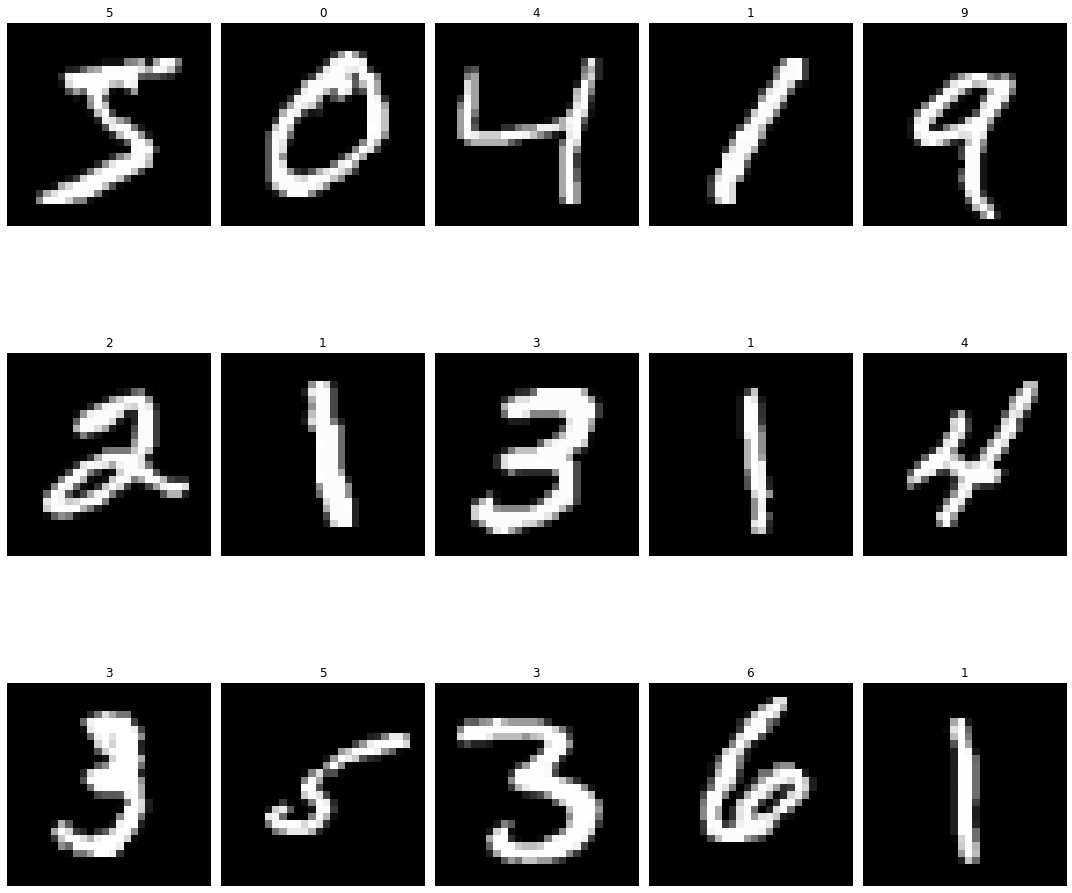

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
get_show_shape([x_train, y_train, x_test, y_test])
get_show_images(x_train[0:15], y_train[0:15], ncols=15)


In [13]:
x_train, x_test  = get_scaler_image(x_train, x_test)

In [17]:
def set_create_model():
    model = Sequential([Flatten(input_shape=(28, 28)),
                        Dense(256, activation="relu"), 
                        Dense(64, activation="relu"), 
                        Dense(32, activation="relu"), 
                        Dense(10, activation="softmax")])
    return model 

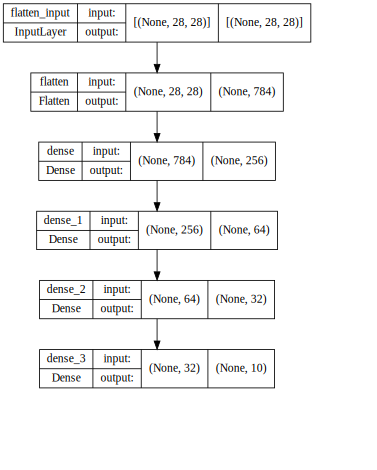

In [18]:
model = set_create_model()
SVG(model_to_dot(model, show_shapes=True, dpi=60).create(prog="dot", format="svg"))

In [19]:
model.compile(optimizer=Adam(lr=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [23]:
def get_batch_size(x, y, batch_size=32):
    for i in range(int(x.shape[0]//batch_size)):
        x_batch = x[i * batch_size:(i+1)*batch_size]
        y_batch = y[i * batch_size:(i+1)*batch_size]
        yield(np.asarray(x_batch), np.asarray(y_batch))

In [29]:
x, y = next(get_batch_size(x_train, y_train))
print(x.shape, y.shape)

(32, 28, 28) (32,)


epoch:1
batch:50, batch_loss:0.1728, batch_accuracy : 0.9531, avg_loss : 0.2770
epoch:1
batch:100, batch_loss:0.3712, batch_accuracy : 0.9375, avg_loss : 0.2997
epoch:1
batch:150, batch_loss:0.1890, batch_accuracy : 0.9453, avg_loss : 0.2904
epoch:1
batch:200, batch_loss:0.2606, batch_accuracy : 0.9297, avg_loss : 0.2730
epoch:1
batch:250, batch_loss:0.1811, batch_accuracy : 0.9375, avg_loss : 0.2643
epoch:1
batch:300, batch_loss:0.2589, batch_accuracy : 0.9297, avg_loss : 0.2517
epoch:1
batch:350, batch_loss:0.1021, batch_accuracy : 0.9688, avg_loss : 0.2425
epoch:1
batch:400, batch_loss:0.1142, batch_accuracy : 0.9609, avg_loss : 0.2370
epoch:1
batch:450, batch_loss:0.1182, batch_accuracy : 0.9531, avg_loss : 0.2271


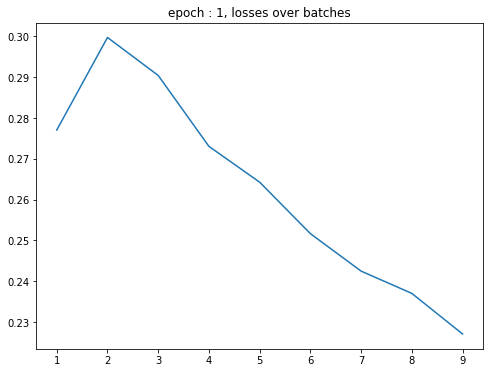

313/313 [==============================] - 1s 2ms/step - loss: 0.1496 - accuracy: 0.9526
epoch :1, val_loss 0.1496, val_accuracy : 0.952600

epoch:2
batch:50, batch_loss:0.0483, batch_accuracy : 0.9844, avg_loss : 0.1139
epoch:2
batch:100, batch_loss:0.1992, batch_accuracy : 0.9688, avg_loss : 0.1283
epoch:2
batch:150, batch_loss:0.1213, batch_accuracy : 0.9453, avg_loss : 0.1254
epoch:2
batch:200, batch_loss:0.2009, batch_accuracy : 0.9609, avg_loss : 0.1230
epoch:2
batch:250, batch_loss:0.0907, batch_accuracy : 0.9766, avg_loss : 0.1230
epoch:2
batch:300, batch_loss:0.1432, batch_accuracy : 0.9531, avg_loss : 0.1201
epoch:2
batch:350, batch_loss:0.0702, batch_accuracy : 0.9766, avg_loss : 0.1181
epoch:2
batch:400, batch_loss:0.0864, batch_accuracy : 0.9844, avg_loss : 0.1195
epoch:2
batch:450, batch_loss:0.0565, batch_accuracy : 0.9844, avg_loss : 0.1165


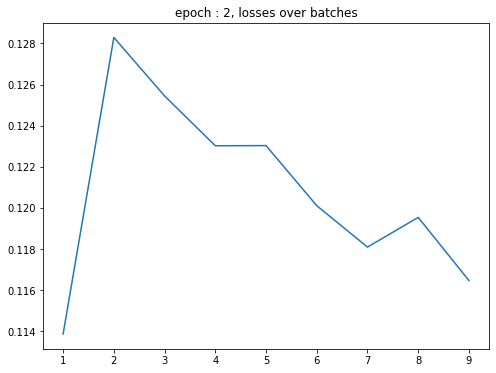

313/313 [==============================] - 1s 2ms/step - loss: 0.1456 - accuracy: 0.9538
epoch :2, val_loss 0.1456, val_accuracy : 0.953800

epoch:3
batch:50, batch_loss:0.0249, batch_accuracy : 0.9922, avg_loss : 0.0797
epoch:3
batch:100, batch_loss:0.1239, batch_accuracy : 0.9766, avg_loss : 0.0838
epoch:3
batch:150, batch_loss:0.1119, batch_accuracy : 0.9609, avg_loss : 0.0810
epoch:3
batch:200, batch_loss:0.1550, batch_accuracy : 0.9766, avg_loss : 0.0800
epoch:3
batch:250, batch_loss:0.0461, batch_accuracy : 0.9922, avg_loss : 0.0806
epoch:3
batch:300, batch_loss:0.0849, batch_accuracy : 0.9688, avg_loss : 0.0802
epoch:3
batch:350, batch_loss:0.0500, batch_accuracy : 0.9844, avg_loss : 0.0791
epoch:3
batch:400, batch_loss:0.0731, batch_accuracy : 0.9844, avg_loss : 0.0798
epoch:3
batch:450, batch_loss:0.0280, batch_accuracy : 1.0000, avg_loss : 0.0778


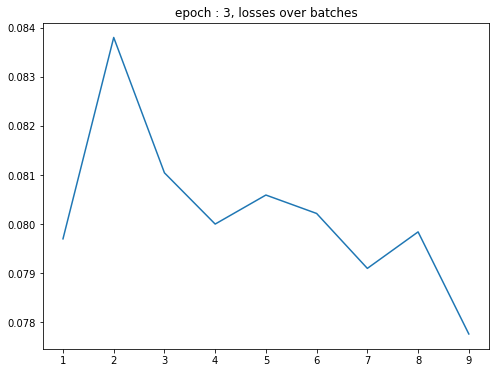

313/313 [==============================] - 1s 2ms/step - loss: 0.1271 - accuracy: 0.9600
epoch :3, val_loss 0.1271, val_accuracy : 0.960000



In [35]:
MONITOR_STEP = 50 

for epoch in range(1, 4):
    batch = 1
    total_loss = 0 
    losses = [] 

    for x, y in get_batch_size(x_train, y_train, batch_size=128):
        loss, acc = model.train_on_batch(x, y)
        total_loss += loss 

        if batch % MONITOR_STEP == 0 :
            losses.append(total_loss/batch)
            print(f"epoch:{epoch}\nbatch:{batch}, batch_loss:{loss:.4f}, batch_accuracy : {acc:.4f}, avg_loss : {total_loss/batch:.4f}")
        
        batch+=1 

    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(1, batch // MONITOR_STEP+1), losses)
    plt.title(f"epoch : {epoch}, losses over batches")
    plt.show()

    loss, acc = model.evaluate(x_test, y_test)
    print("="*20)
    print(f"epoch :{epoch}, val_loss {loss:.4f}, val_accuracy : {acc:4f}")
    print()